# To utvalgs tosidig t-test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

Jeg vil her gi et eksempel på en hypotesetest hvor nullhypotesen er at to gjennomsnitt er like og 
hvor alternativhypotesen er at de er ulike. 

Siden jeg er fiksert på temperaturer vil jeg gjøre denne hypotesen:

I Bergen var temperaturene i januar 2025 var forskjellige fra temperaturene i januar 2024 med et signifikansnivå på $5\%$..

**Antatte gjennomsnittsverdier** $\mu_1$ og $\mu_2$

**Nullhypotese ($H_0)$:** $\mu_1 = \mu_2$.

**Alternativ hypotese ($H_a$):** $\mu_1 \ne \mu_2$.

Dette er veldig likt hva vi allerede har gjort. Jeg setter i gang med å hente data.

## Temperaturdata

In [2]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [3]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


In [4]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [5]:
# Målestasjon Florida Bergen
bergen2024 = meteostat.Daily('01317', datetime(2024, 1, 1), datetime(2024, 1, 31))
bergen2024 = bergen2024.fetch()

In [6]:
# Målestasjon Florida Bergen
bergen2025 = meteostat.Daily('01317', datetime(2025, 1, 1), datetime(2025, 1, 31))
bergen2025 = bergen2025.fetch()

In [7]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
bergen2024['tavg_ffill'] = bergen2024['tavg'].ffill()
bergen2025['tavg_ffill'] = bergen2025['tavg'].ffill()

In [8]:
y = bergen2024['tavg_ffill'].values
z = bergen2025['tavg_ffill'].values

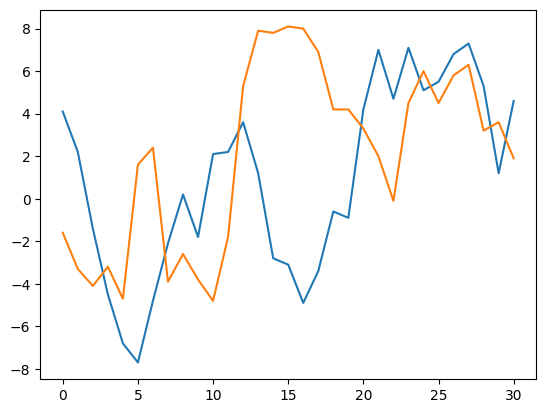

In [9]:
plt.plot(y)
plt.plot(z)

**Her er det lite å se!**

## Kriterier for hypotesetest

For å teste hypotesen om temperaturforskjeller vil jeg bruke en $t$-test. Jeg har ett
utvalg av temperaturforskjeller $y_1, \dots, y_{3652}$, og nullhypotesen
er at disse tallene er trukket fra en normalfordeling med gjennomsnitt $1 \ C^{\circ}$.
Den alternative hypotesen er at tallene er trukket fra en normalfordeling med gjennomsnitt
mindre enn $1 \ C^{\circ}$.

En forutsetning for å kunne bruke en $t$-test er at observasjonene er
normalfordelte. Jeg vet ikke på forhånd om temperaturforskjellene er normalfordelte,
men jeg kan danne meg en formening om dette ved å se på et histogram.
Jeg kan finne normalfordelingskurven som passer best til
mitt data og sammenligne de to.

Hvis det ser bra ut kan jeg fortsette. Ellers må jeg finne en annen
metode eller en annen hypotese.

## Kriterier for hypotesetest

For å teste hypotesen om temperaturforskjeller vil jeg bruke en $t$-test. Jeg har to
utvalg av temperaturer $y_1, \dots, y_{31}$ og $z_1, \dots, z_{31}$, og nullhypotesen
er at disse tallene er trukket fra normalfordeling med samme gjennomsnitt.
Den alternative hypotesen er de to normalfordelingene har forskjellig gjennomsnitt.

En forutsetning for å kunne bruke en $t$-test er at observasjonene er
normalfordelte. Jeg vet ikke på forhånd om temperaturforskjellene er normalfordelte,
men jeg kan danne meg en formening om dette ved å se på et histogram.
Jeg kan finne normalfordelingskurven som passer best til
mitt data og sammenligne de to.

Hvis det ser bra ut kan jeg fortsette. Ellers må jeg finne en annen
metode eller en annen hypotese.

**Sjekker på data:**

Plotter først et histogram av gamle temperaturer.

(Teller hvor mange datapunkter i hvert delintervall i en oppdeling av intervallet av observerte verdier.)

Text(0.5, 1.0, 'Histogram for 2024')

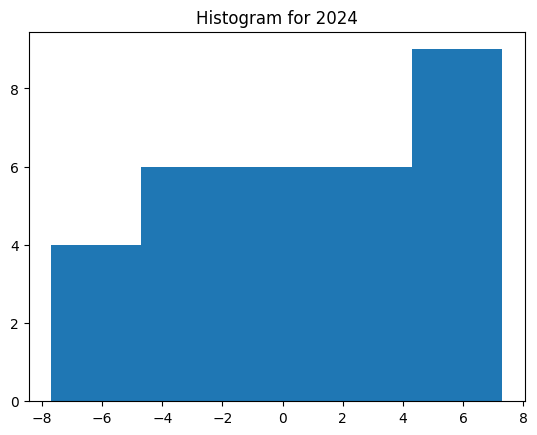

In [10]:
plt.hist(y, bins=5)  # arguments are passed to np.histogram
plt.title("Histogram for 2024")

Text(0.5, 1.0, 'Histogram for 2025')

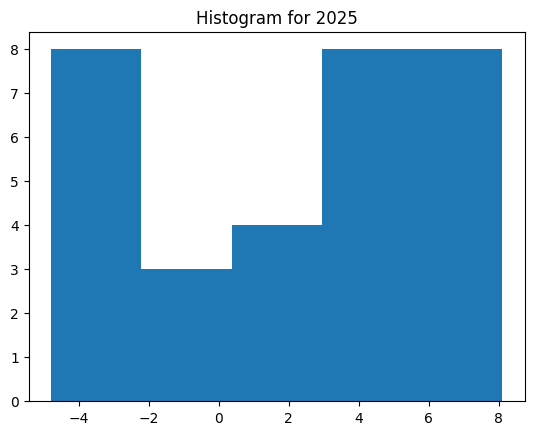

In [11]:
plt.hist(z, bins=5)  # arguments are passed to np.histogram
plt.title("Histogram for 2025")

**Det ser ikke bra ut.** La oss fortsette uansett!

**Vi fortsetter selv om vi egentlig burde gi oss her!**

## To utvalgs t-test

La $n$ være antallet av observasjoner i hver av utvalgene. For oss er $n = 31$.

La $E(y)$ være gjennomsnittet til tallene $y_i$ og la $E(z)$ være gjennomsnittet til tallene $z_i$. Vi kommer igjen til å gi en formel for en $t$-verdi som du for eksempel [finner på Wikipedia sin side om t-test i avsnittet **Equal sample sizes and variance**.](https://en.wikipedia.org/wiki/Student's_t-test)

For å skrive formelen litt fint vil jeg innføre det kombinerte standardavviket
$$\sigma(y,z) = \sqrt{\frac{\sigma(y)^2 + \sigma(z)^2}{2}}.$$

Husk gjerne at standardavviket $\sigma(y)$ er gitt ved formelen $\sigma(y)^2 = E(y^2) - E(y)^2$.

$t$-verdien for vår to utvalgs test er:

$$t\_{\text{verdi}} = \frac{E(y) - E(z)}{\sigma(y, z) \sqrt{2/n}}.$$

Antallet av frihetsgrader er $2n - 2$.

In [12]:
# Beregner t-verdi i python

n = len(y)
Ey = np.mean(y)
Ez = np.mean(z)
sigmayz = np.sqrt((np.mean(y**2) - Ey**2 + np.mean(z**2) - Ez**2)/2)
t_verdi = (Ey - Ez)/(sigmayz*np.sqrt(2/n))

In [13]:
t_verdi

np.float64(-1.009736306839393)

Teorien for normalfordelte observasjoner forutsier at $t$-verdien vi nettopp beregnet vil fordele seg etter en $t$-fordeling med $2n-2$ frihetsgrader.

$t$-fordelingen er tilnærmet lik normalfordelingen med standardavvik $1$ og gjennomsnitt $0$ når antallet av frihetsgrader er stort.

## Overgang fra t-verdi til sannsynlighet, eller p-verdi

Vi antar at temperaturene i utvalgene $y$ og $z$ er fordelt etter en normalfordeling med gjennomsnittsverdier $\mu_1$ og $\mu_2$.

Gitt en $t$-verdien $t\_\text{verdi}$ og antallet av frihetsgrader kan vi finne sannsynligheten for at alternativhypotesen $H_a$: $\mu_1 \ne \mu_2$
og sannsynligheten for nullhypotesen $H_0: \mu_1 = \mu_2$. 

Hvis sannsynligheten for nullhypotesen er veldig liten velger vi å forkaste nullhypotesen.

Vi må på forhånd bestemme oss for hva vi mener med veldig liten.

Et typisk valg er "mindre en 5%".

I vårt tilfelle er $t\_\text{verdi}$ og antall frihetsgrader gitt ved:

In [14]:
# t-verdi og antall frihetsgrader

antall_frihetsgrader = 2*len(y) - 1
float(t_verdi), antall_frihetsgrader

(-1.009736306839393, 61)

Arealet til det røde området på figuren under er sannsynligheten for at nullhypotesen er sann.

Dersom nullhypotesen $H_0: \mu_1 = \mu_2$ er sann, da er er sannsynligheten for å observere $E(y) < E(z)$ og for å observere $E(y) > E(z)$ like store. Det betyr at sannsynligheten for $H_0$ er arealet til det røde området på figuren under:

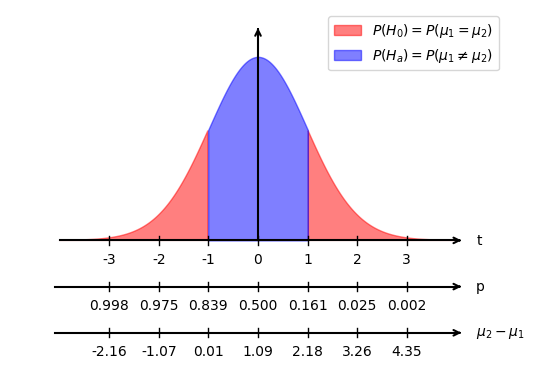

In [15]:
# @title plot

# Define the function
x = np.linspace(-4, 4, 1000)
yy = scipy.stats.t.pdf(x, antall_frihetsgrader)  # t-fordeling med 10 frihetsgrader
t_crit = np.abs(t_verdi)

# def t_av_mu(m):
#     return (Ey - Ez - m)/((sigmayz*np.sqrt(2/n)))

def mu_av_t(t):
    return Ey - Ez - t*((sigmayz*np.sqrt(2/n)))

ax = plt.gca()


plt.fill_between(x, yy, where=(np.abs(x) > t_crit), color='red', alpha=0.5, label=r'$P(H_0)=P(μ_1 = μ_2)$')
plt.fill_between(x, yy, where=(np.abs(x) < t_crit), color='blue', alpha=0.5, label=r'$P(H_a)=P(μ_1\ne μ_2)$')
# Remove default spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Set limits
ax.set_xlim(-5, 5)
ax.set_ylim(-.3, .5)  # Ensure axes are visible

# Draw the primary x-axis (for x) with an arrow
ax.plot([-4, 4], [0, 0], color="black", lw=1.5)
ax.annotate("", xy=(4.1, 0), xytext=(4., 0),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, 0, r"t", verticalalignment="center")

# Draw the secondary x-axis (for -x) with an arrow
ax.plot([-4.1, 4], [-.1, -.1], color="black", lw=1.5)  
ax.annotate("", xy=(4.1, -.1), xytext=(4., -.1),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, -.1, r"p", verticalalignment="center")

# Draw the third x-axis (for -x) with an arrow
ax.plot([-4.1, 4], [-.2, -.2], color="black", lw=1.5)  
ax.annotate("", xy=(4.1, -.2), xytext=(4., -.2),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, -.2, r"$\mu_2 - \mu_1$", verticalalignment="center")

# Draw the y-axis with an arrow
ax.plot([0, 0], [0, .45], color="black", lw=1.5)  
ax.annotate("", xy=(0, .46), xytext=(0, .45),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
#ax.text(-0.3, .45, r"y", verticalalignment="center")


# Set x-ticks for t-axis
ticks = np.arange(-3, 4, 1)  # Tick positions

# Draw ticks for t-axis
for ti in ticks:
    ax.plot([ti, ti], [-.01, .01], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.05, f"{ti}", fontsize=10, ha="center")  # Labels below ticks

# Draw ticks for p-axis
for ti in ticks:
    p = scipy.stats.t.cdf(-ti, antall_frihetsgrader)
    ax.plot([ti, ti], [-.11, -.09], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.15, f"{p:.3f}", fontsize=10, ha="center")  # Labels below ticks


# Set ticks for $\mu$-axis
# mu_min = mu_av_t(-3)
# mu_maks = mu_av_t(3)
# mu_verdier = np.linspace(mu_min, mu_maks, endpoint=True, num=7)
# muticks = [t_av_mu(mu) for mu in mu_verdier]
# muticks = [mu_av_t(t) for t in ticks]
# Draw ticks for secondary x-axis (-x)
#for t, mu in zip(muticks, mu_verdier):
for ti in ticks:    
    ax.plot([ti, ti], [-.21, -.19], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.25, f"{int(-100*mu_av_t(ti))/100:.2f}", fontsize=10, ha="center")  # Labels below ticks

# Remove y-ticks
ax.set_yticks([])
ax.set_xticks([])
plt.legend()
plt.show()


**Antatte gjennomsnittsverdier** $\mu_1$ og $\mu_2$

**Nullhypotese ($H_0)$:** $\mu_1 = \mu_2$.

**Alternativ hypotese ($H_a$):** $\mu_1 \ne \mu_2$.

Nullhypotesen $\mu_1 = \mu_2$ (eller $\mu_1 \le \mu_2$) forkastes når sannsynligheten for alternativ hypotese $H_1$: $\mu_1 > \mu_2$ er minst $95 \%$. Det er det samme som at sannsynligheten for $H_0$ er høyst $5 \%$.

I gitt fall sier vi at nullhypotesen forkastes med $5 \%$ signifikansnivå.

Som for normalfordelingen kan scipy hjelpe oss med å finne dette arealet:

In [16]:
# p-verdi
p_verdi = 2*(1 - scipy.stats.t.cdf(np.abs(t_verdi), df=antall_frihetsgrader))

In [17]:
#vi får p-verdien i prosent:
float(100 * p_verdi)

31.66102444047254

Vi kan altså **ikke**,  med et signifikansnivå på 5%, forkaste nullhypotesen som sier at temperaturen i Bergen var forskjellige i januar 2024 og januar 2025.

**Konklusjon:**

Vi vet ikke om temperaturen i Bergen var forskjellig i januar 2024 og 2025.

## Oppgave:

Jeg har blitt fortalt at temperaturene i januar 2022 var uvanlig høye. Gjør både en ensidig og en tosidig t-test på om temperaturene i januar 2022 var signifikant forskjellige fra temperaturene i 2025. 

[Test av stigningstall for regresjonslinje](testhelding.ipynb)